In [164]:
#importing important libraries and machine learning sk-learn algorithms.
%matplotlib inline
import numpy as np
import cv2
import cv
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sn
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [157]:
#reading heavy images features scv file
df_heavy = pd.read_csv("k-100/hist_heavy.csv")
df_heavy.shape

(227, 101)

In [158]:
#reading medium images features scv file
df_medium = pd.read_csv("k-100/hist_medium.csv")
df_medium.shape

(219, 101)

In [9]:
#reading light images features scv file
df_light = pd.read_csv("k-100/hist_light.csv")
df_light.shape

(853, 101)

In [10]:
#now concat all three class csv files 
df = pd.concat([df_light,df_medium,df_heavy],ignore_index=True)

In [12]:
#all data will be in form of heavy, medium ,lights so we have to suffle all data,
#so that all rows get in random order.
data = df.iloc[np.random.permutation(len(df))]

In [13]:
#print last 5 rows
data.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,
378,0.003571,0.005357,0.016071,0.008929,0.028571,0.007143,0.010714,0.008929,0.008929,0.007143,0.007143,0.001786,0.000000,0.007143,0.005357,0.012500,0.019643,0.007143,0.008929,0.003571,...
1238,0.006579,0.006579,0.006579,0.002193,0.010965,0.006579,0.008772,0.017544,0.000000,0.008772,0.013158,0.015351,0.000000,0.006579,0.006579,0.010965,0.002193,0.004386,0.015351,0.002193,...
385,0.005038,0.005038,0.005038,0.012594,0.027708,0.007557,0.002519,0.007557,0.005038,0.007557,0.007557,0.002519,0.005038,0.007557,0.012594,0.005038,0.025189,0.007557,0.012594,0.007557,...
823,0.005025,0.012563,0.015075,0.012563,0.002513,0.010050,0.005025,0.010050,0.010050,0.007538,0.010050,0.010050,0.002513,0.010050,0.020101,0.005025,0.015075,0.017588,0.015075,0.005025,...
10,0.007663,0.015326,0.003831,0.011494,0.026820,0.007663,0.007663,0.003831,0.003831,0.000000,0.011494,0.007663,0.000000,0.000000,0.011494,0.011494,0.015326,0.003831,0.007663,0.007663,...


In [14]:
# printing top 5 rows
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,
1052,0.007364,0.008837,0.014728,0.005891,0.016200,0.013255,0.004418,0.010309,0.016200,0.007364,0.007364,0.011782,0.002946,0.019146,0.017673,0.005891,0.011782,0.008837,0.019146,0.002946,...
661,0.003861,0.011583,0.007722,0.003861,0.003861,0.011583,0.007722,0.003861,0.000000,0.011583,0.007722,0.003861,0.003861,0.015444,0.011583,0.011583,0.000000,0.003861,0.015444,0.007722,...
548,0.005396,0.005396,0.044964,0.008993,0.028777,0.008993,0.003597,0.008993,0.000000,0.012590,0.003597,0.003597,0.000000,0.005396,0.012590,0.003597,0.017986,0.012590,0.012590,0.001799,...
124,0.009950,0.002488,0.022388,0.007463,0.039801,0.009950,0.004975,0.012438,0.004975,0.004975,0.004975,0.000000,0.002488,0.017413,0.007463,0.002488,0.039801,0.007463,0.009950,0.009950,...
909,0.009671,0.009671,0.029013,0.005803,0.023211,0.005803,0.001934,0.021277,0.017408,0.005803,0.009671,0.015474,0.003868,0.021277,0.007737,0.013540,0.023211,0.013540,0.005803,0.005803,...


In [15]:
X  = data.ix[:,data.columns != 'label'].values # all features or input 
y = data['label'].values # all target or accutal output

In [31]:
#spliting data into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print "size of train data = ", X_train.shape,"size of test data = ", X_test.shape
print "size of target train data = ", y_train.shape, "size of target test data = ",y_test.shape

size of train data =  (1039, 100) size of test data =  (260, 100)
size of target train data =  (1039,) size of target test data =  (260,)


# SVM Classifier

In [67]:
clf = svm.SVC(kernel='poly')
print clf
cl = clf.fit(X_train, y_train)
y_pred = cl.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel=poly, max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [68]:
score = accuracy_score(y_test, y_pred)
print score

0.688461538462


# Random Forest Classifier

In [35]:
clf = RandomForestClassifier()
cl = clf.fit(X_train, y_train)
y_pred = cl.predict(X_test)
score = accuracy_score(y_test, y_pred)
print score

0.884615384615


# AdaBoost Classifier

In [72]:
clf = AdaBoostClassifier(n_estimators=30)
cl = clf.fit(X_train, y_train)
y_pred = cl.predict(X_test)
score = accuracy_score(y_test, y_pred)
print score

0.907692307692


# ExtraTree Classifier

In [101]:
clf = ExtraTreesClassifier(n_estimators = 340)
cl = clf.fit(X_train, y_train)
y_pred1 = cl.predict(X_test)
score1 = accuracy_score(y_test, y_pred1)
print score1

0.953846153846


# Metrix Classification Report

In [102]:
print metrics.classification_report(y_test, y_pred1)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       179
          1       0.88      0.84      0.86        44
          2       0.97      0.86      0.91        37

avg / total       0.95      0.95      0.95       260



In [126]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred1)
print cm

[[179   0   0]
 [  6  37   1]
 [  0   5  32]]


# Plot Confusion matrix 

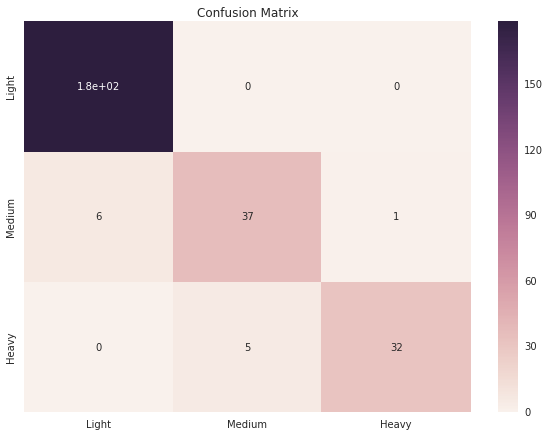

In [167]:
df_cm = pd.DataFrame(cm, index = [i for i in ['Light','Medium','Heavy']],
                  columns = [i for i in ['Light','Medium','Heavy']])
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix")
sn.heatmap(df_cm, annot=True)

In [166]:
clf = ExtraTreesClassifier(n_estimators = 340)
print(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

0.929183064997
